<a href="https://colab.research.google.com/github/tankiet14102001/PM2.5-visualization_3D/blob/add-time-series_vertical-profile_branch/notebooks/test_vertical_profile_20240627.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os

# CHANGE THIS BELOW PATHS TO YOUR OWN DRIVE PATH CONTAINED YOUR FOLDER DATASET
#path = '/content/gdrive/My Drive/Colab Notebooks/projects/thesis_dust-box_from-20240106/data/BKbox/'
path = '/content/gdrive/My Drive/Colab Notebooks/PM2.5-visualization_3D/data/train/'
os.chdir(path)
os.listdir()  # current folder structure in top layer

Mounted at /content/gdrive


['2000-01-01.txt',
 '2024-04-29.txt',
 '2024-05-28.txt',
 '2024-05-29.txt',
 '2024-05-30.txt',
 '2024-06-02.txt',
 '2024-06-03.txt',
 '2024-06-04.txt',
 '2024-06-05.txt',
 '2024-06-24.txt']

<ipython-input-4-9a19cad65ebb>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('2024-05-28.txt', header=None, names=["DateTime", "Temp", "Humi", "Press", "PM1_0", "PM2_5", "PM10", "Bat", "Lat", "Long", "Alt"], parse_dates=["DateTime"])
<ipython-input-4-9a19cad65ebb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Alt'] = pd.to_numeric(filtered_data['Alt'], errors='coerce')
<ipython-input-4-9a19cad65ebb>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

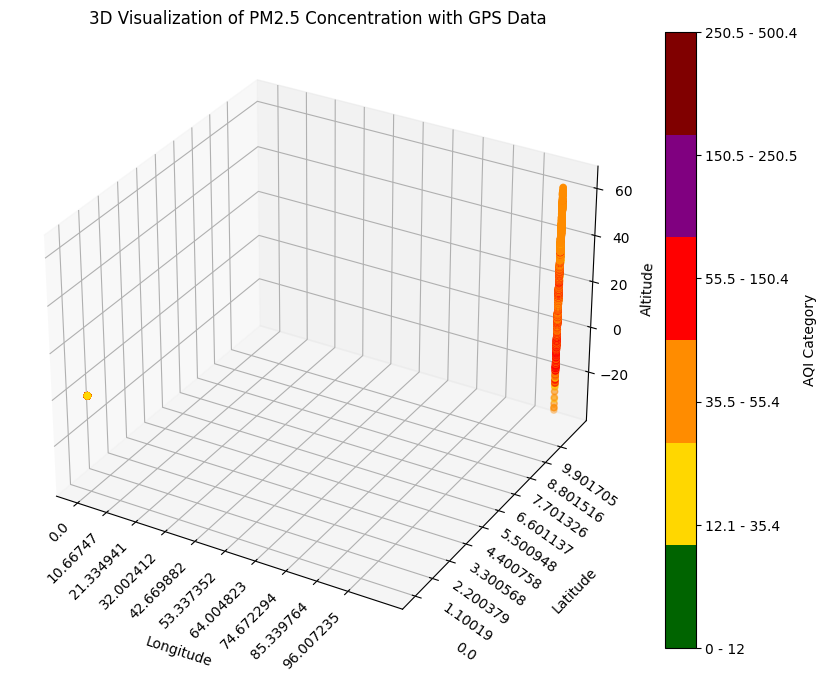

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.cm import ScalarMappable

file_name = ''

# Step 1: Read the CSV file and filter required columns
data = pd.read_csv('2024-05-28.txt', header=None, names=["DateTime", "Temp", "Humi", "Press", "PM1_0", "PM2_5", "PM10", "Bat", "Lat", "Long", "Alt"], parse_dates=["DateTime"])
filtered_data = data[["DateTime", "PM2_5", "Lat", "Long", "Alt"]]

# Step 2: Prepare the data
# Convert 'Alt' column to numeric, coerce errors to NaN
filtered_data['Alt'] = pd.to_numeric(filtered_data['Alt'], errors='coerce')

# Drop rows with NaN values in 'Alt' column
filtered_data.dropna(subset=['Alt'], inplace=True)

# Convert 'Lat' and 'Long' columns to numeric
filtered_data['Lat'] = pd.to_numeric(filtered_data['Lat'], errors='coerce')
filtered_data['Long'] = pd.to_numeric(filtered_data['Long'], errors='coerce')

# Drop rows with NaN values in 'Lat' and 'Long' columns
filtered_data.dropna(subset=['Lat', 'Long'], inplace=True)

# Convert 'PM2_5' column to numeric, coerce errors to NaN
filtered_data['PM2_5'] = pd.to_numeric(filtered_data['PM2_5'], errors='coerce')

# Drop rows with NaN values in the 'PM2_5' column
filtered_data.dropna(subset=['PM2_5'], inplace=True)

# Step 3: Define AQI categories and assign colors
aqi = {
    'Good': {'pm2.5': [0, 12], 'color': '#006400'},
    'Moderate': {'pm2.5': [12.1, 35.4], 'color': '#FFD700'},
    'Unhealthy for Sensitive Groups': {'pm2.5': [35.5, 55.4], 'color': '#FF8C00'},
    'Unhealthy': {'pm2.5': [55.5, 150.4], 'color': 'red'},
    'Very Unhealthy': {'pm2.5': [150.5, 250.5], 'color': 'purple'},
    'Hazardous': {'pm2.5': [250.5, 500.4], 'color': 'maroon'}
}

# Function to map PM2.5 concentration to AQI category
def map_to_aqi_category(pm2_5):
    for category, thresholds in aqi.items():
        if thresholds['pm2.5'][0] <= pm2_5 <= thresholds['pm2.5'][1]:
            return category
    return None

# Map PM2.5 concentrations to AQI categories
filtered_data['AQI_Category'] = filtered_data['PM2_5'].apply(map_to_aqi_category)

# Step 4: Plot the data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with 'PM2_5' as color
colors = [aqi[category]['color'] for category in filtered_data['AQI_Category']]
sc = ax.scatter(filtered_data['Long'], filtered_data['Lat'], filtered_data['Alt'], c=colors)

# Customize labels and title
ax.set_xlabel('Longitude', labelpad=30)
ax.set_ylabel('Latitude', labelpad=30)
ax.set_zlabel('Altitude')
ax.set_title('3D Visualization of PM2.5 Concentration with GPS Data')

# Calculate step size for longitude and latitude axes
lon_step = (filtered_data['Long'].max() - filtered_data['Long'].min()) / 10
lat_step = (filtered_data['Lat'].max() - filtered_data['Lat'].min()) / 10

# Set tick locations and labels for longitude and latitude axes
ax.set_xticks(np.arange(filtered_data['Long'].min(), filtered_data['Long'].max(), lon_step))
ax.set_yticks(np.arange(filtered_data['Lat'].min(), filtered_data['Lat'].max(), lat_step))
ax.set_xticklabels(np.arange(filtered_data['Long'].min(), filtered_data['Long'].max(), lon_step).round(6), rotation=45, ha='right', va='center', rotation_mode='anchor')
ax.set_yticklabels(np.arange(filtered_data['Lat'].min(), filtered_data['Lat'].max(), lat_step).round(6), rotation=-35, ha='right', va='center', rotation_mode='anchor')

# Adjust the distance of y-ticks from the y-axis
ax.tick_params(axis='y', pad=30)

# Create a ScalarMappable to map data values to colors
sm = ScalarMappable(cmap=ListedColormap([aqi[category]['color'] for category in aqi]), norm=Normalize(vmin=0, vmax=len(aqi)-1))
sm.set_array([])  # Dummy array needed for ScalarMappable
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('AQI Category')

# Add boundaries of AQI categories to color bar
boundary_ticks = [(aqi[category]['pm2.5'][0] + aqi[category]['pm2.5'][1]) / 2 for category in aqi]
cbar.ax.set_yticks(np.arange(len(aqi)))
cbar.ax.set_yticklabels([f"{aqi[category]['pm2.5'][0]} - {aqi[category]['pm2.5'][1]}" for category in aqi.keys()])

plt.show()


In [2]:
filtered_data.describe
# Print extracted latitude and longitude values
print(filtered_data[['Lat', 'Long', 'Alt']].head())


NameError: name 'filtered_data' is not defined

Enter the file name (with extension): 2024-05-28.txt


<ipython-input-6-65fc556a7300>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(file_name, header=None, names=["DateTime", "Temp", "Humi", "Press", "PM1_0", "PM2_5", "PM10", "Bat", "Lat", "Long", "Alt"], parse_dates=["DateTime"])
<ipython-input-6-65fc556a7300>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Alt'] = pd.to_numeric(filtered_data['Alt'], errors='coerce')
<ipython-input-6-65fc556a7300>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

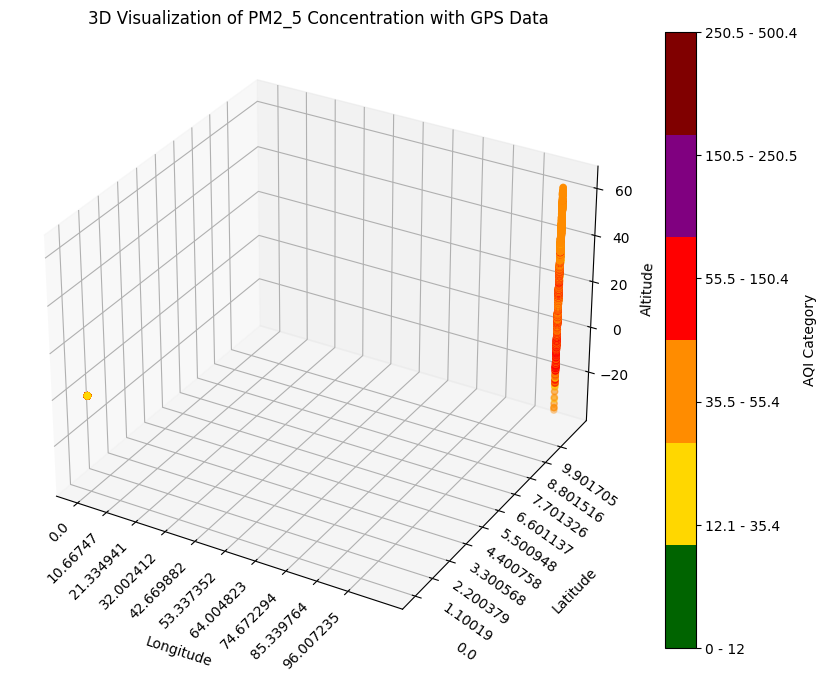

<ipython-input-6-65fc556a7300>:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DateTime'] = pd.to_datetime(filtered_data['DateTime'])


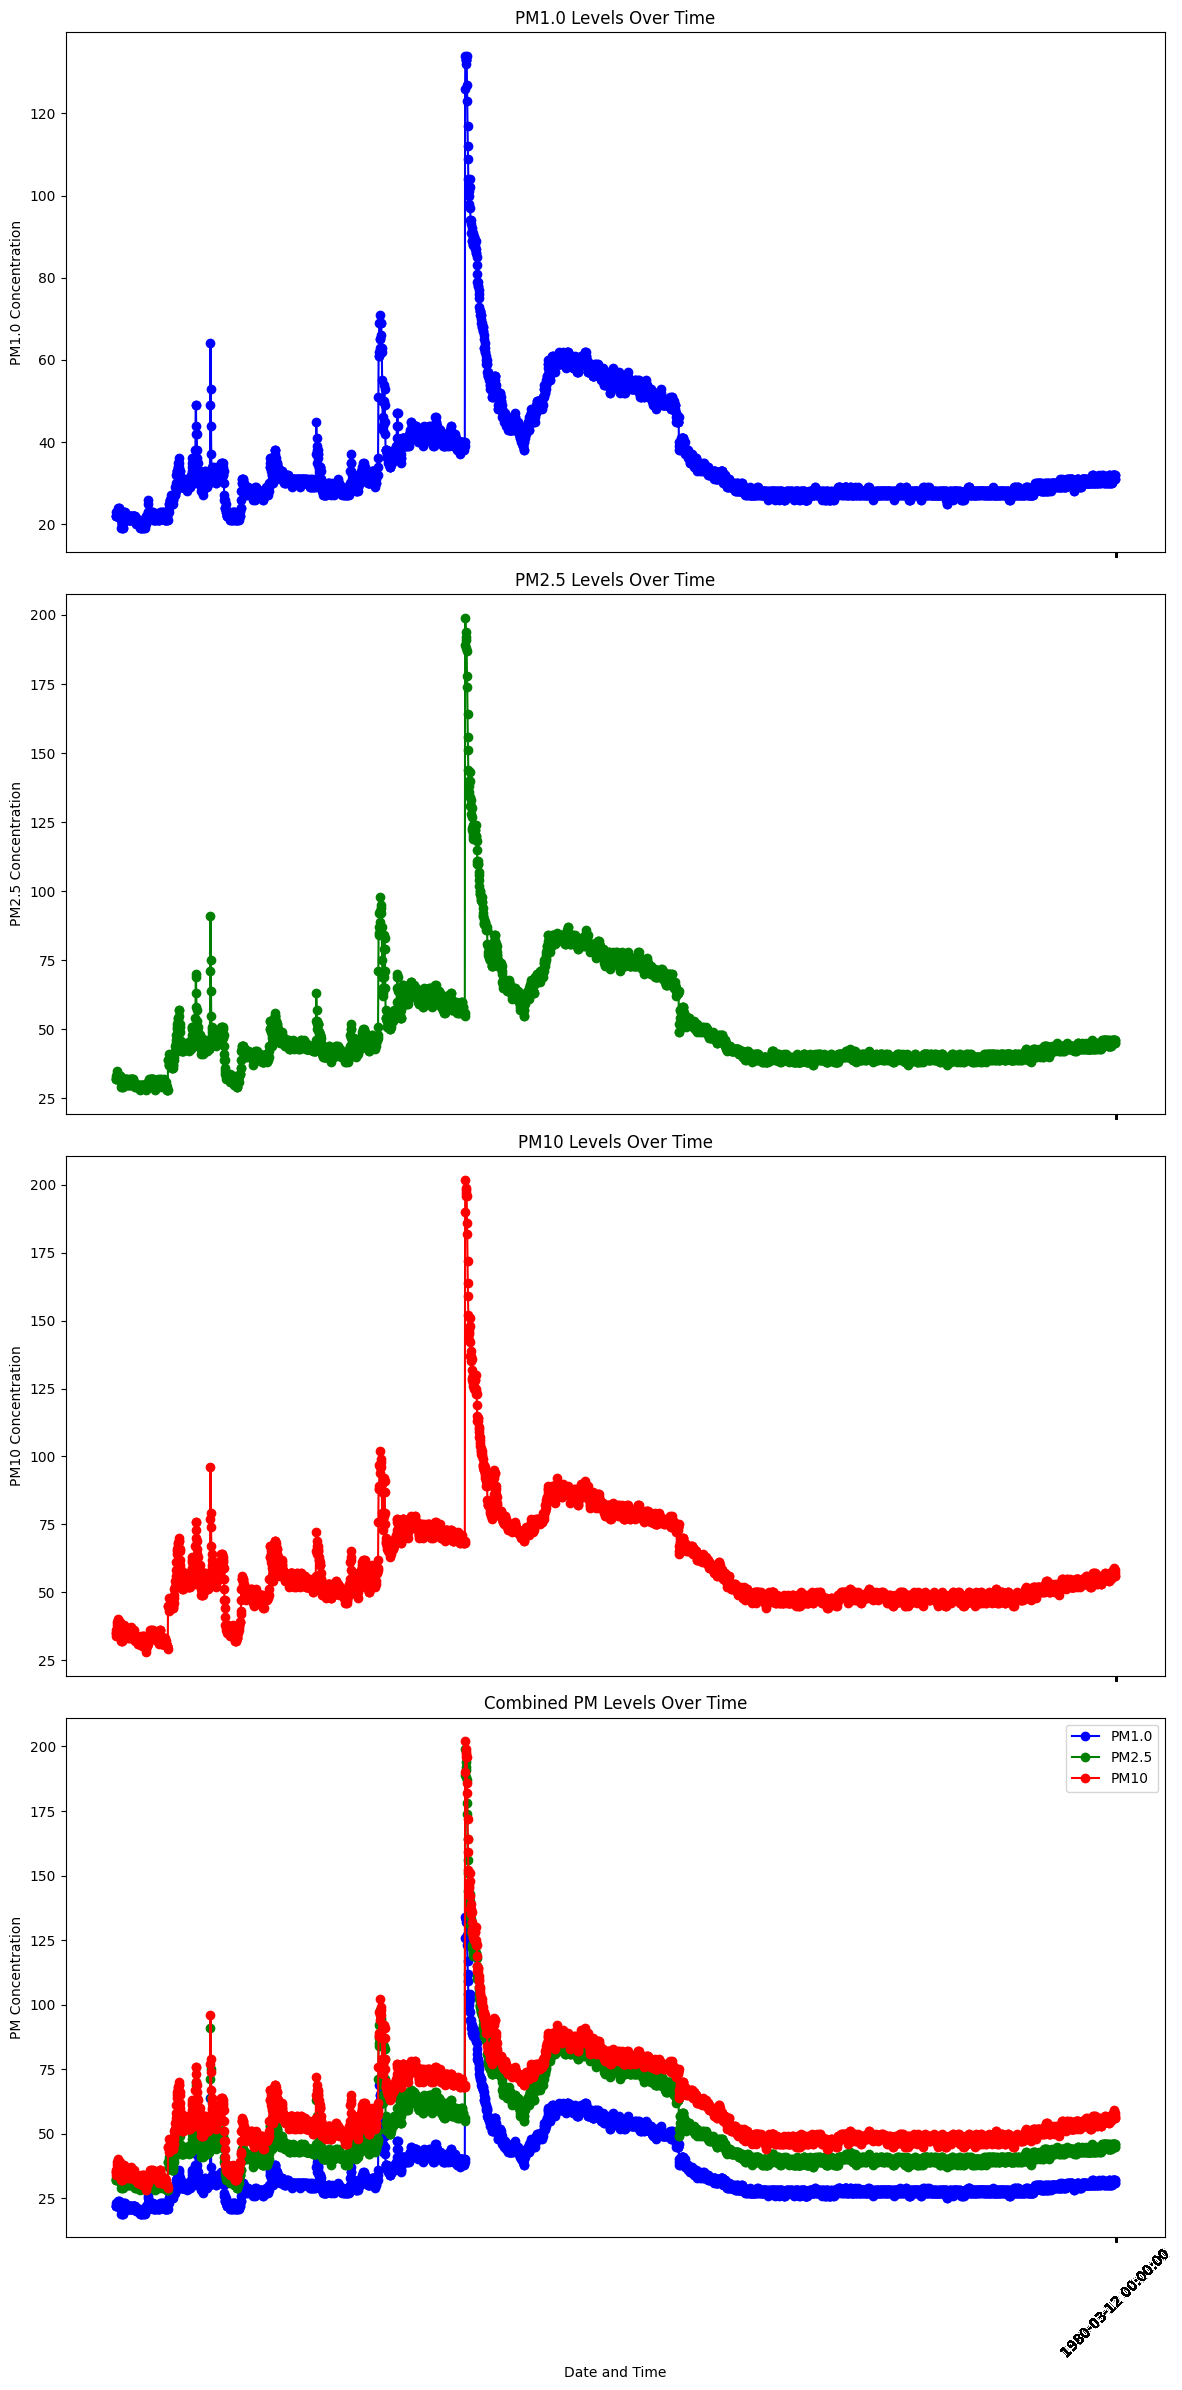

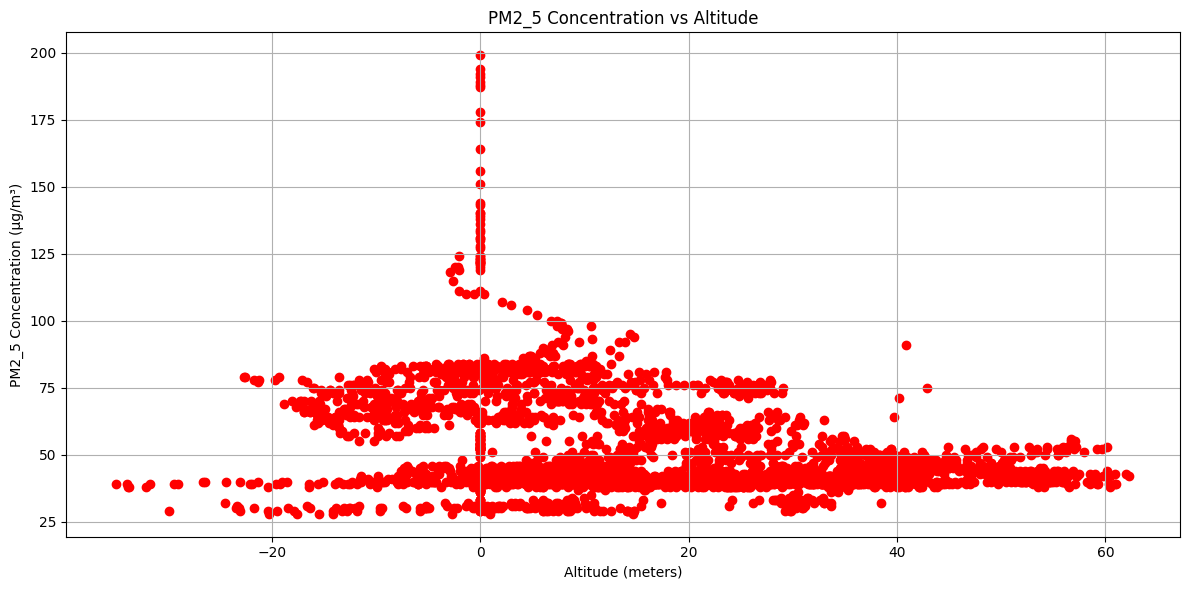

<ipython-input-6-65fc556a7300>:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['AltitudeGroup'] = pd.cut(filtered_data['Alt'], bins=altitude_bins, labels=bin_labels, right=False)
<ipython-input-6-65fc556a7300>:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['AltitudeGroup'] = filtered_data['AltitudeGroup'].astype(str)
<ipython-input-6-65fc556a7300>:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

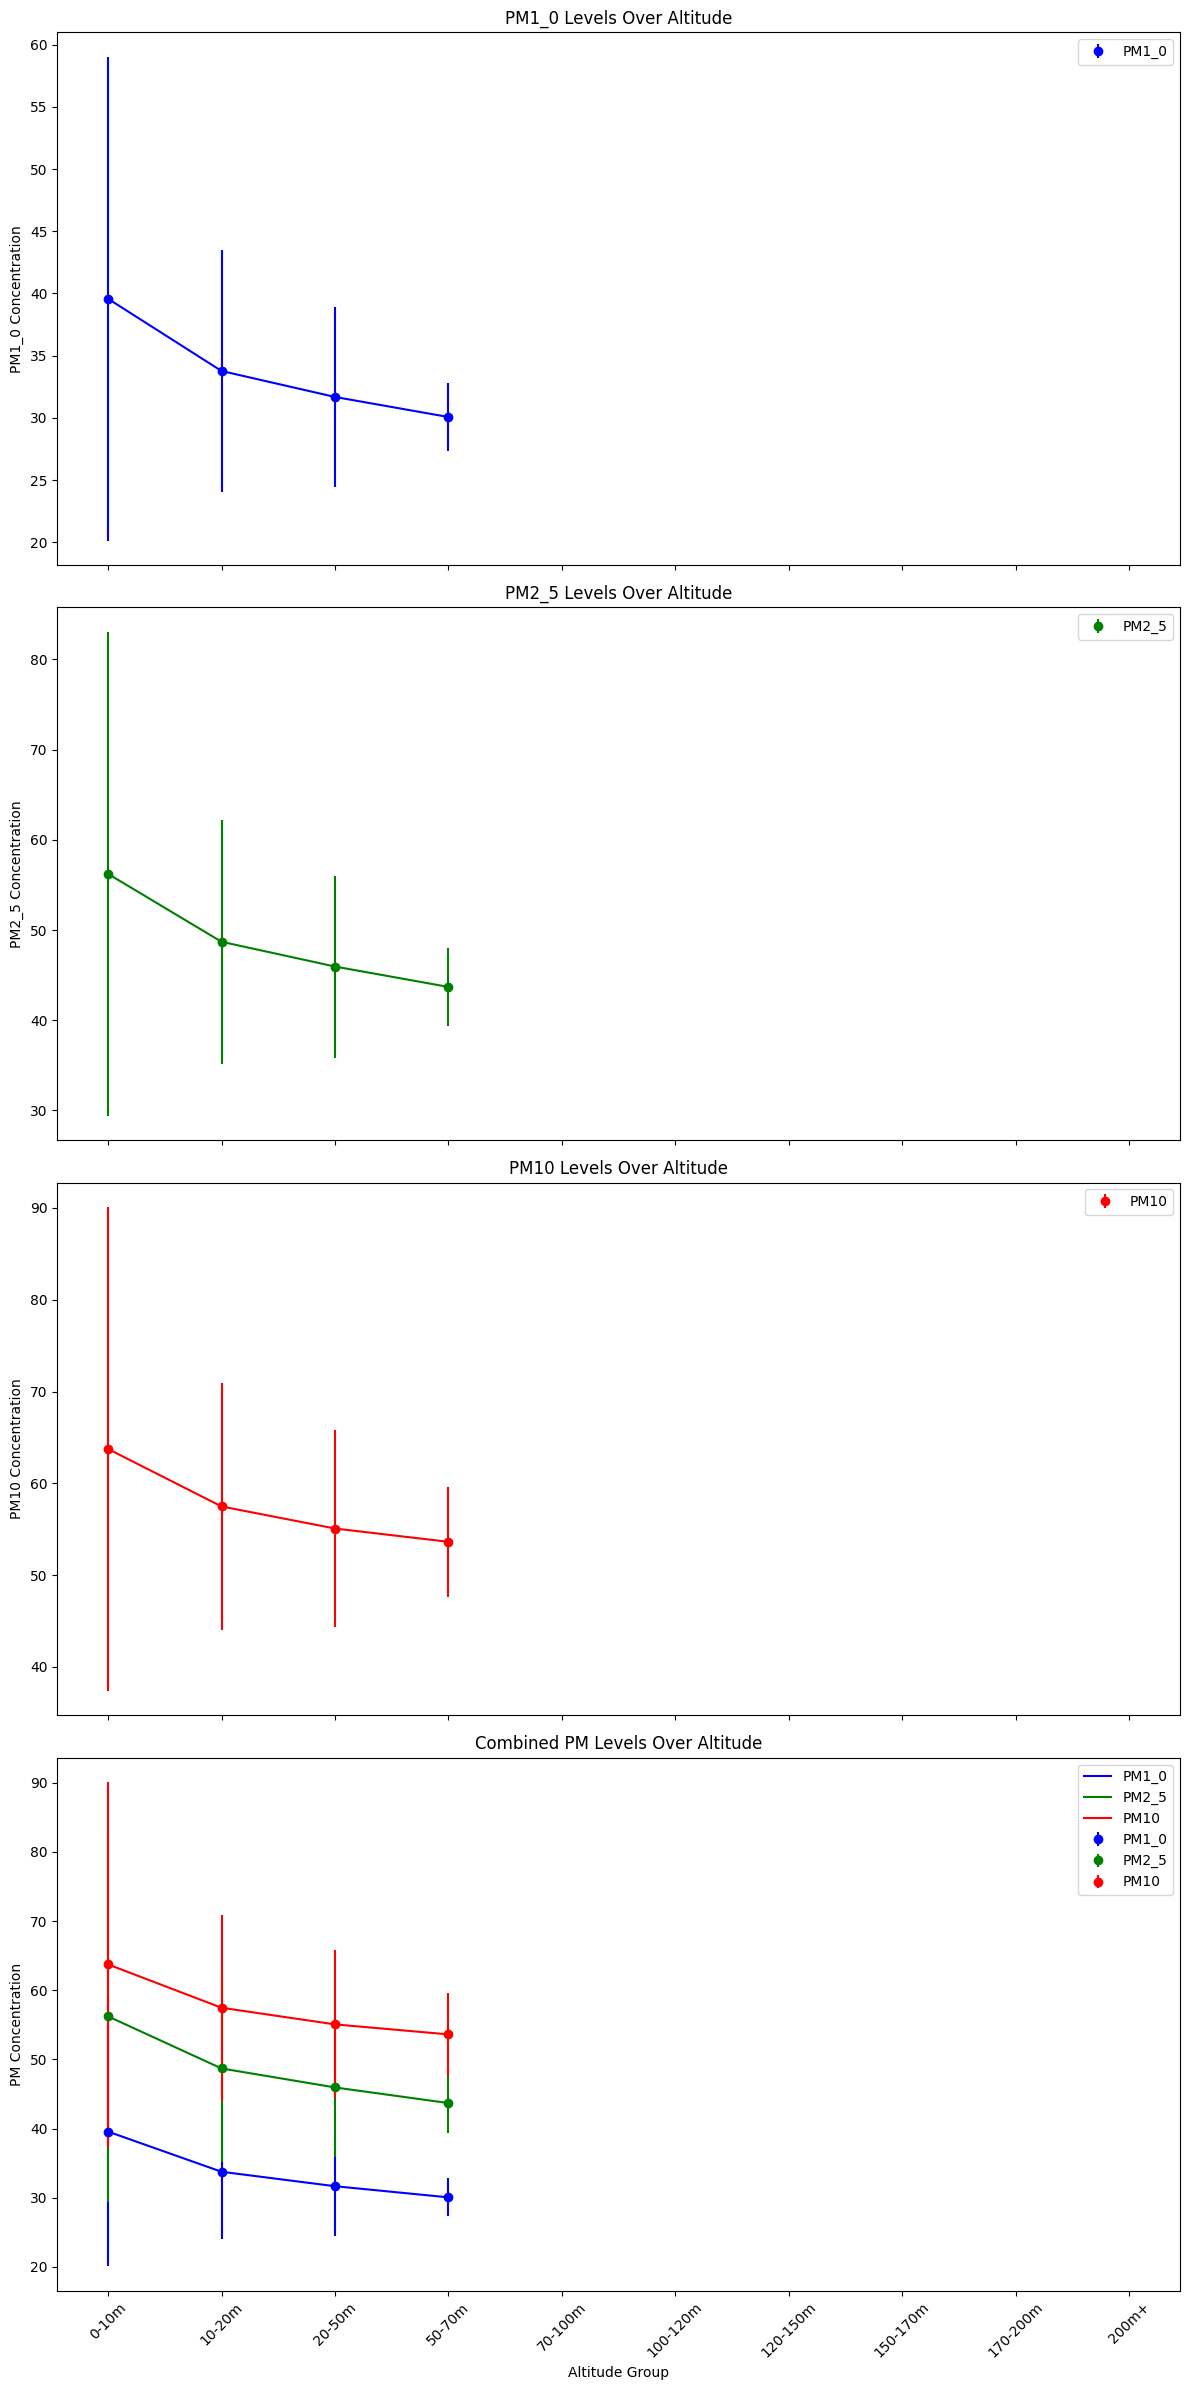

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.dates import DateFormatter

# Allow user to input file name
file_name = input("Enter the file name (with extension): ")

# Step 1: Read the CSV file and filter required columns
data = pd.read_csv(file_name, header=None, names=["DateTime", "Temp", "Humi", "Press", "PM1_0", "PM2_5", "PM10", "Bat", "Lat", "Long", "Alt"], parse_dates=["DateTime"])
filtered_data = data[["DateTime", "PM1_0", "PM2_5", "PM10", "Lat", "Long", "Alt"]]

# Step 2: Prepare the data
# Convert 'Alt' column to numeric, coerce errors to NaN
filtered_data['Alt'] = pd.to_numeric(filtered_data['Alt'], errors='coerce')

# Drop rows with NaN values in 'Alt' column
filtered_data.dropna(subset=['Alt'], inplace=True)

# Convert 'Lat' and 'Long' columns to numeric
filtered_data['Lat'] = pd.to_numeric(filtered_data['Lat'], errors='coerce')
filtered_data['Long'] = pd.to_numeric(filtered_data['Long'], errors='coerce')

# Drop rows with NaN values in 'Lat' and 'Long' columns
filtered_data.dropna(subset=['Lat', 'Long'], inplace=True)

# Convert 'PM1_0', 'PM2_5', and 'PM10' columns to numeric, coerce errors to NaN
for particle_size in ['PM1_0', 'PM2_5', 'PM10']:
    filtered_data[particle_size] = pd.to_numeric(filtered_data[particle_size], errors='coerce')
    filtered_data.dropna(subset=[particle_size], inplace=True)

# Step 3: Define AQI categories and assign colors
aqi = {
    'Good': {'pm2.5': [0, 12], 'color': '#006400'},
    'Moderate': {'pm2.5': [12.1, 35.4], 'color': '#FFD700'},
    'Unhealthy for Sensitive Groups': {'pm2.5': [35.5, 55.4], 'color': '#FF8C00'},
    'Unhealthy': {'pm2.5': [55.5, 150.4], 'color': 'red'},
    'Very Unhealthy': {'pm2.5': [150.5, 250.5], 'color': 'purple'},
    'Hazardous': {'pm2.5': [250.5, 500.4], 'color': 'maroon'}
}

# Function to map PM2.5 concentration to AQI category
def map_to_aqi_category(pm2_5):
    for category, thresholds in aqi.items():
        if thresholds['pm2.5'][0] <= pm2_5 <= thresholds['pm2.5'][1]:
            return category
    return None

# Map PM2.5 concentrations to AQI categories
filtered_data['AQI_Category'] = filtered_data['PM2_5'].apply(map_to_aqi_category)

# Step 4: Plot the 3D data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with 'PM2_5' as color
colors = [aqi[category]['color'] for category in filtered_data['AQI_Category']]
sc = ax.scatter(filtered_data['Long'], filtered_data['Lat'], filtered_data['Alt'], c=colors)

# Customize labels and title
ax.set_xlabel('Longitude', labelpad=30)
ax.set_ylabel('Latitude', labelpad=30)
ax.set_zlabel('Altitude')
ax.set_title('3D Visualization of PM2_5 Concentration with GPS Data')

# Calculate step size for longitude and latitude axes
lon_step = (filtered_data['Long'].max() - filtered_data['Long'].min()) / 10
lat_step = (filtered_data['Lat'].max() - filtered_data['Lat'].min()) / 10

# Set tick locations and labels for longitude and latitude axes
ax.set_xticks(np.arange(filtered_data['Long'].min(), filtered_data['Long'].max(), lon_step))
ax.set_yticks(np.arange(filtered_data['Lat'].min(), filtered_data['Lat'].max(), lat_step))
ax.set_xticklabels(np.arange(filtered_data['Long'].min(), filtered_data['Long'].max(), lon_step).round(6), rotation=45, ha='right', va='center', rotation_mode='anchor')
ax.set_yticklabels(np.arange(filtered_data['Lat'].min(), filtered_data['Lat'].max(), lat_step).round(6), rotation=-35, ha='right', va='center', rotation_mode='anchor')

# Adjust the distance of y-ticks from the y-axis
ax.tick_params(axis='y', pad=30)

# Create a ScalarMappable to map data values to colors
sm = ScalarMappable(cmap=ListedColormap([aqi[category]['color'] for category in aqi]), norm=Normalize(vmin=0, vmax=len(aqi)-1))
sm.set_array([])  # Dummy array needed for ScalarMappable
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('AQI Category')

# Add boundaries of AQI categories to color bar
boundary_ticks = [(aqi[category]['pm2.5'][0] + aqi[category]['pm2.5'][1]) / 2 for category in aqi]
cbar.ax.set_yticks(np.arange(len(aqi)))
cbar.ax.set_yticklabels([f"{aqi[category]['pm2.5'][0]} - {aqi[category]['pm2.5'][1]}" for category in aqi.keys()])

plt.show()

# Step 5: Plot PM1.0, PM2.5, and PM10 vs DateTime
fig, axs = plt.subplots(4, 1, figsize=(12, 24), sharex=True)

# Plot PM1.0
axs[0].plot(filtered_data['DateTime'], filtered_data['PM1_0'], marker='o', linestyle='-', color='b')
axs[0].set_title('PM1.0 Levels Over Time')
axs[0].set_ylabel('PM1.0 Concentration')

# Plot PM2.5
axs[1].plot(filtered_data['DateTime'], filtered_data['PM2_5'], marker='o', linestyle='-', color='g')
axs[1].set_title('PM2.5 Levels Over Time')
axs[1].set_ylabel('PM2.5 Concentration')

# Plot PM10
axs[2].plot(filtered_data['DateTime'], filtered_data['PM10'], marker='o', linestyle='-', color='r')
axs[2].set_title('PM10 Levels Over Time')
axs[2].set_ylabel('PM10 Concentration')

# Plot Combined PM
axs[3].plot(filtered_data['DateTime'], filtered_data['PM1_0'], label='PM1.0', marker='o', linestyle='-', color='b')
axs[3].plot(filtered_data['DateTime'], filtered_data['PM2_5'], label='PM2.5', marker='o', linestyle='-', color='g')
axs[3].plot(filtered_data['DateTime'], filtered_data['PM10'], label='PM10', marker='o', linestyle='-', color='r')
axs[3].set_title('Combined PM Levels Over Time')
axs[3].set_xlabel('Date and Time')
axs[3].set_ylabel('PM Concentration')
axs[3].legend()

# Convert 'DateTime' column to datetime objects
filtered_data['DateTime'] = pd.to_datetime(filtered_data['DateTime'])

# Set the x-axis ticks to be every Nth element for better readability
N = 50  # Change N to the desired interval
ticks_loc = filtered_data.index[::N]
tick_labels = filtered_data['DateTime'].dt.strftime('%Y-%m-%d %H:%M:%S').iloc[::N]

for ax in axs:
    ax.set_xticks(ticks_loc)
    ax.set_xticklabels(tick_labels, rotation=45)

# Use DateFormatter for better control over date formatting
date_format = DateFormatter('%Y-%m-%d %H:%M:%S')
axs[3].xaxis.set_major_formatter(date_format)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Step 6: Plot PM2.5 vs Altitude
plt.figure(figsize=(12, 6))
plt.scatter(filtered_data['Alt'], filtered_data['PM2_5'], color='r')
plt.xlabel('Altitude (meters)')
plt.ylabel('PM2_5 Concentration (µg/m³)')
plt.title('PM2_5 Concentration vs Altitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Plot the vertical profile of PM2.5
# Define altitude bins with correct order
altitude_bins = [0, 10, 20, 50, 70, 100, 120, 150, 170, 200, np.inf]
bin_labels = ['0-10m', '10-20m', '20-50m', '50-70m', '70-100m', '100-120m', '120-150m', '150-170m', '170-200m', '200m+']

# Create a new column 'AltitudeGroup' based on altitude bins
filtered_data['AltitudeGroup'] = pd.cut(filtered_data['Alt'], bins=altitude_bins, labels=bin_labels, right=False)

# Convert 'AltitudeGroup' to a string
filtered_data['AltitudeGroup'] = filtered_data['AltitudeGroup'].astype(str)

# Convert 'AltitudeGroup' to a categorical type with custom order
filtered_data['AltitudeGroup'] = pd.Categorical(filtered_data['AltitudeGroup'], categories=bin_labels, ordered=True)

# Define colors for each particle size
particle_colors = {'PM1_0': 'b', 'PM2_5': 'g', 'PM10': 'r'}

# Create subplots for each particle size and a combined plot
fig, axs = plt.subplots(4, 1, figsize=(12, 24), sharex=True)

# Plot Average PM with standard deviation and connecting lines
for i, particle_size in enumerate(['PM1_0', 'PM2_5', 'PM10']):
    group_stats = filtered_data.groupby('AltitudeGroup')[particle_size].agg(['mean', 'std'])
    axs[i].errorbar(group_stats.index, group_stats['mean'], yerr=group_stats['std'], fmt='o', label=particle_size, color=particle_colors[particle_size])
    axs[i].plot(group_stats.index, group_stats['mean'], linestyle='-', color=particle_colors[particle_size])

    axs[i].set_title(f'{particle_size} Levels Over Altitude')
    axs[i].set_ylabel(f'{particle_size} Concentration')
    axs[i].legend()

# Plot Average Combined PM with standard deviation and connecting lines
group_stats_combined = filtered_data.groupby('AltitudeGroup')[['PM1_0', 'PM2_5', 'PM10']].agg(['mean', 'std'])
for particle_size in ['PM1_0', 'PM2_5', 'PM10']:
    color = particle_colors[particle_size]
    axs[3].errorbar(group_stats_combined.index, group_stats_combined[particle_size]['mean'],
                    yerr=group_stats_combined[particle_size]['std'], fmt='o', label=particle_size, color=color)
    axs[3].plot(group_stats_combined.index, group_stats_combined[particle_size]['mean'], linestyle='-', color=color, label=particle_size)

axs[3].set_title('Combined PM Levels Over Altitude')
axs[3].set_xlabel('Altitude Group')
axs[3].set_ylabel('PM Concentration')
axs[3].legend()

# Set x-axis ticks and labels
axs[3].set_xticks(np.arange(len(bin_labels)))
axs[3].set_xticklabels(bin_labels, rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
